In [1]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
import random
from PIL import Image

In [3]:
def sampleAndPlot(img):
    river = np.transpose(np.where(img>=128))
    nonRiver = np.transpose(np.where(img<128))
    rand50 = np.random.randint(0, river.shape[0], 50)
    rand100 = np.random.randint(0, nonRiver.shape[0], 100)
    river50 = np.zeros((50, 2), dtype=int)
    nonRiver100 = np.zeros((100, 2), dtype=int)
    for i in range(50):
        river50[i] = [river[rand50[i]][0], river[rand50[i]][1]]
    for i in range(100):
        nonRiver100[i] = [nonRiver[rand100[i]][0], nonRiver[rand100[i]][1]] 
    # print(river50.shape, nonRiver100.shape)

    plt.imshow(img, cmap='Accent')
    plt.scatter(x = list(map(lambda p: p[1], river50)), y = list(map(lambda p: p[0], river50)), c='b', s=10)
    plt.scatter(x = list(map(lambda p: p[1], nonRiver100)), y = list(map(lambda p: p[0], nonRiver100)), c='r', s=10)
    plt.show()

    return river50, nonRiver100

In [2]:
def get_data(path):
    img = Image.open(path, 'r')
    p = np.array(list(img.getdata())).reshape(512,512)
    return p

img1 = get_data('images/1.gif')

img2 = get_data('images/2.gif')

img3 = get_data('images/3.gif')

img4 = get_data('images/4.gif')

(512, 512)


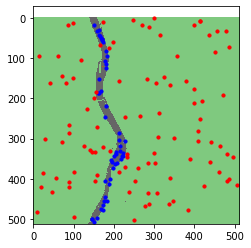

(50, 2)
(100, 2)


In [4]:
img = plt.imread('images/UDCV3.jpeg')
print(img.shape)
river50, nonRiver100 = sampleAndPlot(img)
print(river50.shape)
print(nonRiver100.shape)

In [5]:
riverValues = []
nonriverValues = []

for i in range(50):
    x, y = river50[i]
    riverValues.append([img1[x][y], img2[x][y], img3[x][y], img4[x][y]])

for i in range(100):  # get 100 non-river point data
    x, y = nonRiver100[i]
    nonriverValues.append([img1[x][y], img2[x][y], img3[x][y], img4[x][y]])

riverValues = np.array(riverValues)
print(riverValues.shape)
nonriverValues = np.array(nonriverValues)
print(nonriverValues.shape)

(50, 4)
(100, 4)


In [6]:
# Calculate Mean
riverMean = np.mean(riverValues, axis = 0)
nonriverMean = np.mean(nonriverValues, axis = 0)

# Calculate covariance for river and non river class
diffRiver = riverValues - riverMean
diffNonriver = nonriverValues - nonriverMean

covRiver = (float(1) / float(riverValues.shape[0])) * np.dot(diffRiver.T, diffRiver)
covNonriver = (float(1) / float(nonriverValues.shape[0])) * np.dot(diffNonriver.T, diffNonriver)

#creating test data
data = np.empty(shape=(512,512, 4),dtype='uint8')
for i in range(512):
    for j in range(512):
        data[i][j][0] = img1[i][j]
        data[i][j][1] = img2[i][j]
        data[i][j][2] = img3[i][j]
        data[i][j][3] = img4[i][j]

In [7]:
def main(P1,P2):
    final_ans = np.zeros((512, 512))
    
    for i in range(512):
        for j in range(512):
            modifiedData = data[i][j] - riverMean
        
            river_class = np.dot(np.dot(modifiedData.T, np.linalg.inv(covRiver)), modifiedData)
            river_prediction = (float(1) / ((float(2) * np.pi) ** 2)) * (float(1) / (np.sqrt(np.linalg.det(covRiver)))) * np.exp((float(-0.5)) * river_class)
        
            modifiedData = data[i][j] - nonriverMean
            non_river_class = np.dot(np.dot(np.transpose((modifiedData)), np.linalg.inv(covNonriver)), modifiedData)
            non_river_prediction =  (float(1) / ((float(2) * np.pi) ** 2)) * (float(1) / (np.sqrt(np.linalg.det(covNonriver)))) * np.exp((float(-0.5)) * non_river_class)
        
            if(P1 * river_prediction >= P2 * non_river_prediction) :
                final_ans[i][j] = 255
            else :
                final_ans[i][j] = 0
    return final_ans

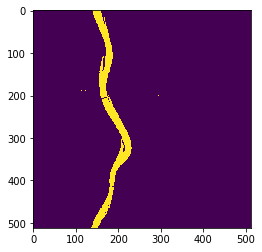

In [8]:
im = Image.fromarray(main(0.7,0.3).reshape(img.shape).astype('uint8')*255)
plt.imshow(im)
plt.show()

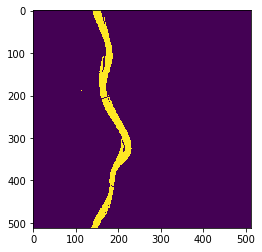

In [9]:
im = Image.fromarray(main(0.5,0.5).reshape(img.shape).astype('uint8')*255)
plt.imshow(im)
plt.show()

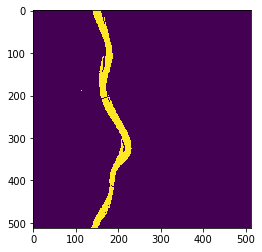

In [10]:
im = Image.fromarray(main(0.3,0.7).reshape(img.shape).astype('uint8')*255)
plt.imshow(im)
plt.show()